In [1]:
require(data.table)
require(ggplot2)

Loading required package: data.table
Loading required package: ggplot2


In [14]:
z <- rbind(
    cbind(AEO="Reference", fread("energy-prices-reference-all-eia-real-dollars.tsv", stringsAsFactors=TRUE)),
    cbind(AEO="Low Resource", fread("energy-prices-low-resource-all-eia-real-dollars.tsv", stringsAsFactors=TRUE)),
    cbind(AEO="High Price", fread("energy-prices-high-price-all-eia-real-dollars.tsv", stringsAsFactors=TRUE))
)
summary(z)

     AEO                                                          Material   
 Length:8856        Coal [MMBtu]                                      : 972  
 Class :character   Diesel [gal]                                      : 972  
 Mode  :character   Electricity (Commercial) [kWh]                    : 972  
                    Electricity (Industrial) [kWh]                    : 972  
                    Motor Gasoline (Transportation) [gal]             : 972  
                    Natural Gas (Commercial) (Stationary Fuel) [MMBtu]: 972  
                    (Other)                                           :3024  
                 Zone           Year      Price [$/unit]   Billable?     
 East North Central: 972   Min.   :2015   Min.   : 0.000   Mode:logical  
 East South Central: 972   1st Qu.:2024   1st Qu.: 2.143   TRUE:8856     
 Middle Atlantic   : 972   Median :2032   Median : 4.321   NA's:0        
 Mountain          : 972   Mean   :2032   Mean   : 5.957                 
 New E

In [15]:
levels(z$Material)

[1] "Coal [MMBtu]"                                            
 [2] "Diesel [gal]"                                            
 [3] "Electricity (Commercial) [kWh]"                          
 [4] "Electricity (Industrial) [kWh]"                          
 [5] "Motor Gasoline (Transportation) [gal]"                   
 [6] "Natural Gas (Commercial) (Stationary Fuel) [MMBtu]"      
 [7] "Natural Gas (Industrial) (Central H2 Production) [MMBtu]"
 [8] "Natural Gas (Industrial) (Stationary Fuel) [MMBtu]"      
 [9] "Residual Oil [MMBtu]"                                    
[10] "Water Total [cm3]"

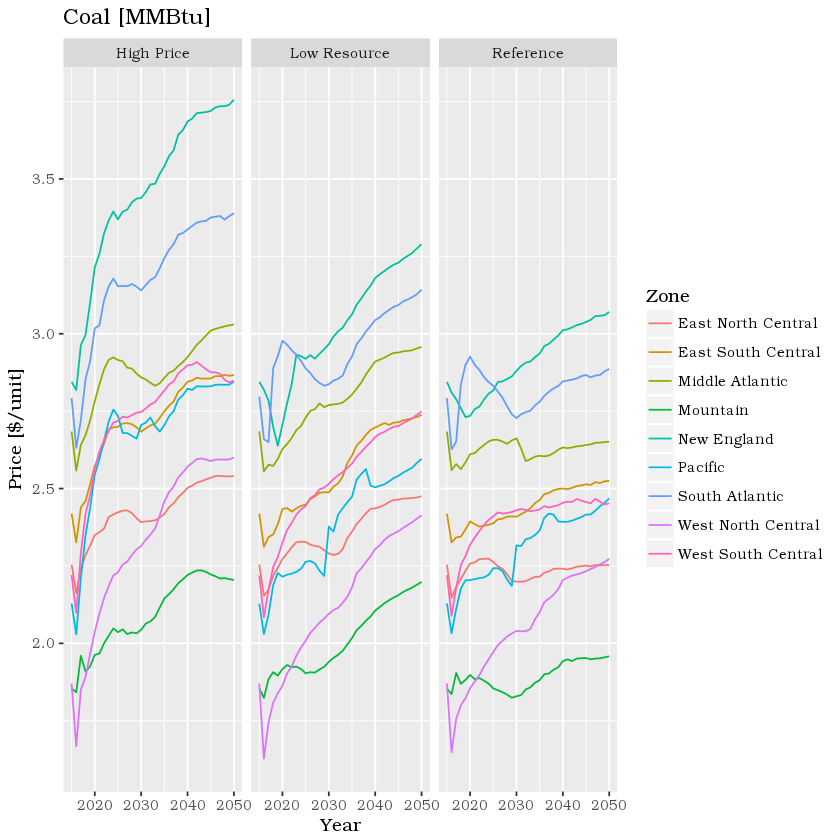

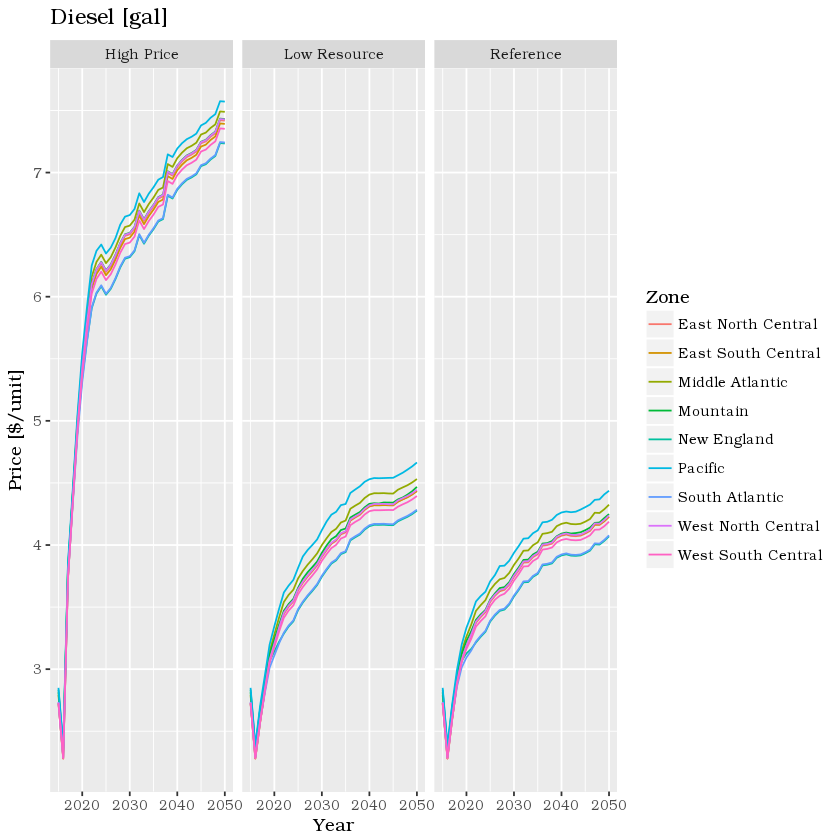

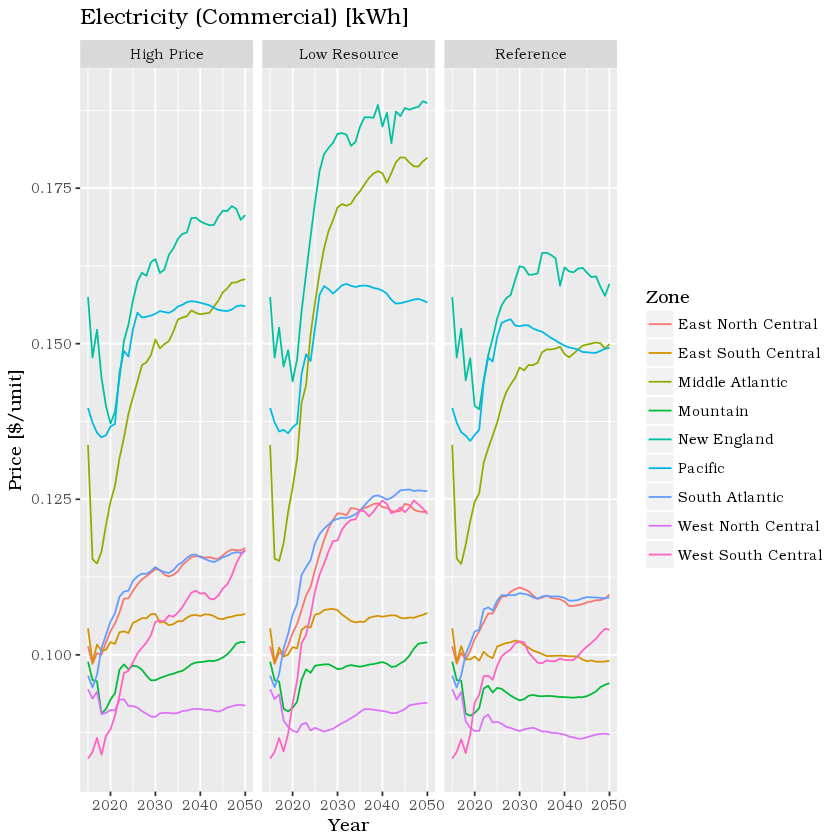

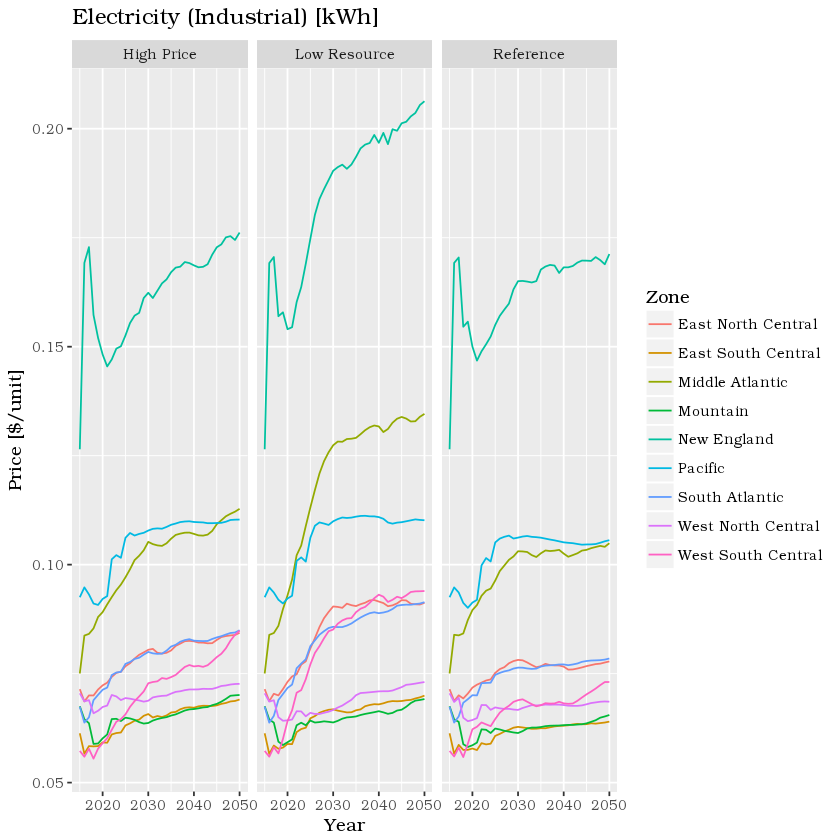

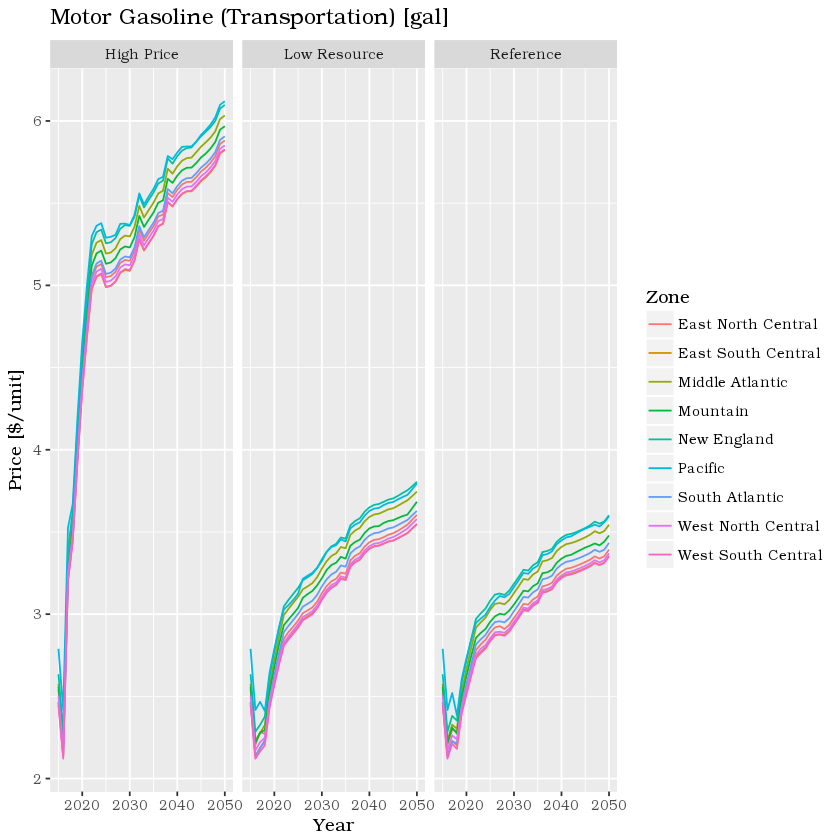

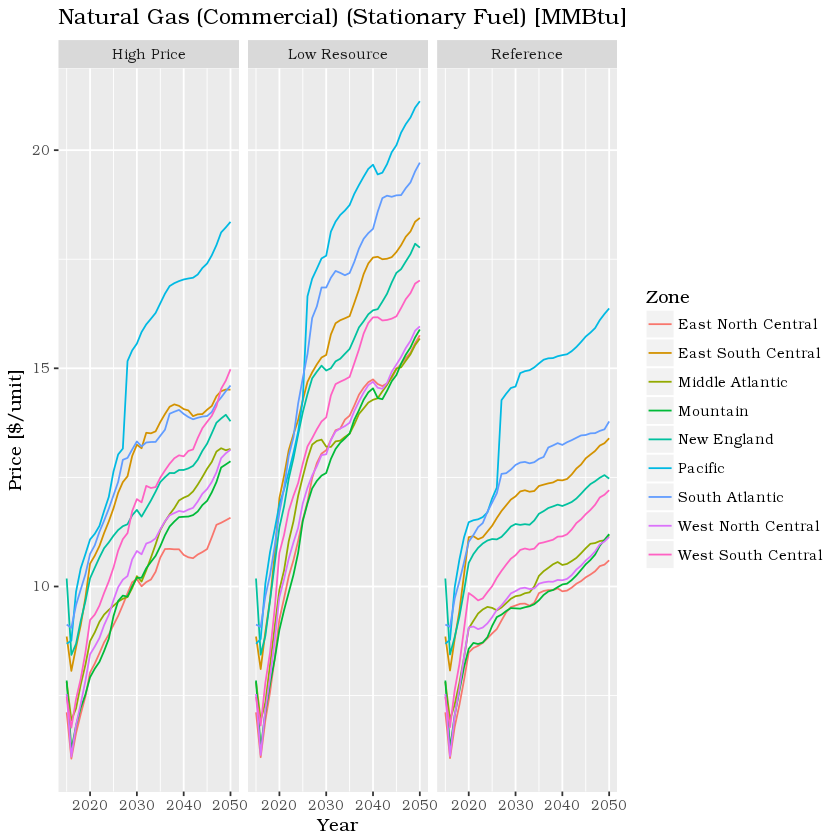

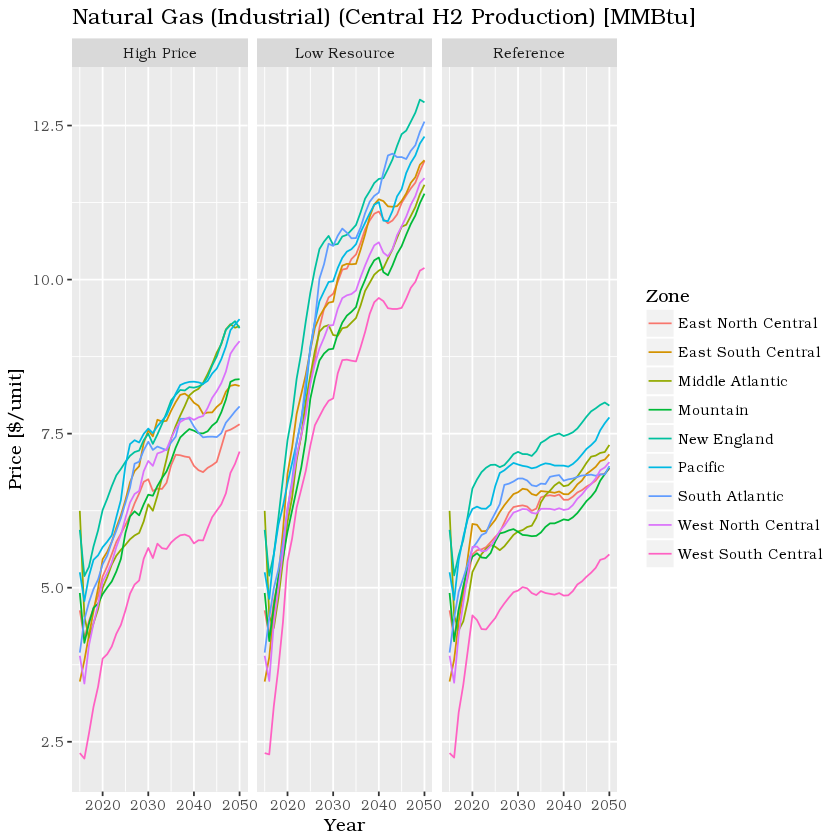

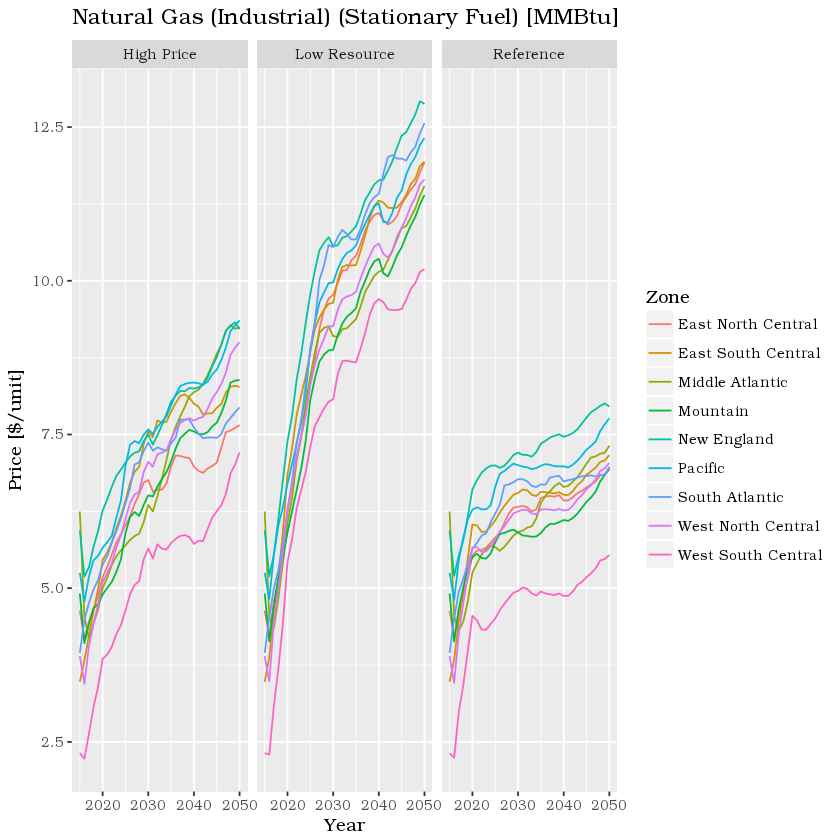

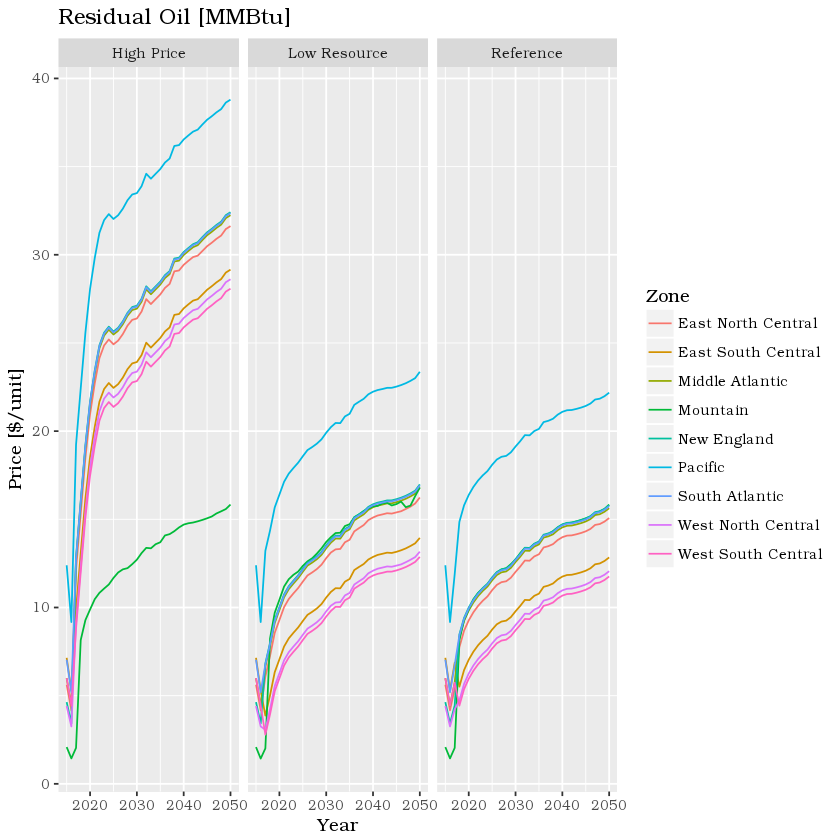

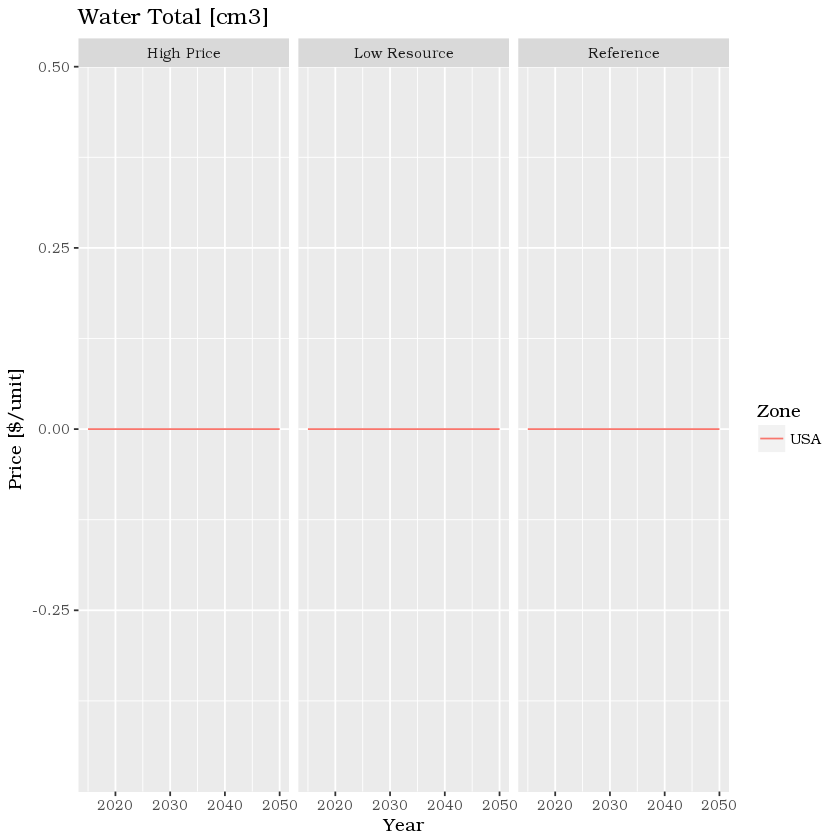

In [16]:
for (m in levels(z$Material)) {
    g <- ggplot(z[`Material` == m, ]) +
      aes(x=`Year`, y=`Price [$/unit]`, color=`Zone`) +
      facet_grid(. ~ `AEO`) +
      geom_line() +
      ggtitle(m)
    show(g)
}